![](https://storage.googleapis.com/kaggle-datasets-images/952827/1613819/d6088a240b65b74c5b8fa735958b08c5/dataset-cover.jpg?t=2020-11-03-05-53-42)
# Introduction

Hello everyone,

In this project, I tried to follow this [YouTube series](https://youtube.com/playlist?list=PLvz5lCwTgdXByZ_z-LFo4vJbbFIMPhkkM&si=Y9YvVVVBlJ2wQQbO) and explain every step in an easy way so everyone could get it.
As a model, I've used the CNN (Convolutional Neural Network) algorithm, which is part of the Deep Learning Algorithms. As a dataset, I've used the "fruit-and-vegetable-image recognition" dataset.

First, I want to start with our dataset. Our dataset contains 3 different files, and each file has as many subfolders (36) as the number of classes. Our subfolders contain the relevant class images.

Before moving on to the modelling phase, we preprocessed our training and validation datasets for our model. Then we adjusted the necessary parameters for our model and created our final model.

We evaluated our model, which is in its final stage.

In the last part of the project, I took care to share the model score changes over time with visualisation techniques.


Additionally, I share a resource on how model development is done in the "Plus +" section. Those who are curious can take a look.

--------------------

Herkese merhaba,

Burada projece bu [youtube serisini](https://youtube.com/playlist?list=PLvz5lCwTgdXByZ_z-LFo4vJbbFIMPhkkM&si=Y9YvVVVBlJ2wQQbO) takip ettim ve adımları tek tek anladığım şekliyle açıklamaya çalıştım. Bu projede "fruit-and-vegetable-image-recogniton" veri setini kullandım ve bir deep learning algoritması olan CNN(Convolutional Neural Network) algoritmasını kullanarak meyve ve sezbzeleri tanıyan bir model geliştirdim.

Ilk olarak veri setimizi inceleyerek yola çıkmak istiyorum. Veri setimiz 3 farklı klasor içeriyor ve her bir klasör sınıf sayımız kadar alt klasöre sahip.Alt klasörlerimizde ilgili sınıfın görsellerini içeriyor.

Modelleme aşamasına geçmeden önce Train ve Validation veri setimizi model için uygun hale getirdik. Daha sonra modelimiz için gerekli olan parametre ayarlamalarını gerçekleştirdik ve en son modelimizi oluşturduk.

En son aşama olan modelimiz değerlendirdik.

Projenin son bölümünde model skor degerlerini de sizlerle paylaşmaya özen gösterdim.

Ek olarak Plus+ bölümünde model algoritmasının nasıl çalıştığı ile ilgili bir kaynak paylaştım. Merak edenler göz atabilir.

# Content


* [<font size=4>EDA</font>](#1)
     * [Adding important libraries](#1.1)
     * [Data Preprocessing Using Keras API ](#1.2)
         * [Training image Preprocessing](#1.2.1)
         * [Validation image preprocessing ](#1.2.2)
* [<font size=4>Model Building</font>](#2)  
     * [Building Convolutional Layer](#2.1)
         * [Applying One More Time](#2.1.1)
     * [Training and Compiling](#2.2)
* [<font size=4>Model Evaluating</font>](#3)  
* [<font size=4>Saving Model</font>](#4) 
     * [Calculating Accuracy of Model Achieved on Validation set](#4.1)
         * [Accuracy Visualization ](#4.1.1)
             * [Visualization Training Dataset's Accuracy](#4.1.1.1)
             * [Visualization Validation Dataset's Accuracy](#4.1.1.2)
* [<font size=4>Evaluating Test Dataset</font>](#5) 

# Plus +
[How Convolutional Neural Networks(CNN) Works](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

# EDA <a id="1"></a>

## Importing important libraries <a id="1.1"></a>

In [49]:
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Preprocessing Using Keras API <a id="1.2"></a>

### Training image Preprocessing <a id="1.2.1"></a>

In [50]:
#we are getting Training dataset for model
training_set=tf.keras.utils.image_dataset_from_directory(
"/kaggle/input/fruit-and-vegetable-image-recognition/train", # directory for images
    labels="inferred", #it will take labels name from directory's file name(apple,banana...)
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


### Validation image preprocessing <a id="1.2.2"></a>

In [51]:
#we are getting Validation dataset for model
validation_set=tf.keras.utils.image_dataset_from_directory(
"/kaggle/input/fruit-and-vegetable-image-recognition/validation", # directory for images
    labels="inferred", #it will take labels name from directory's file name(apple,banana.)
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


## Model Building <a id="2"></a>

In [52]:
cnn=tf.keras.models.Sequential()

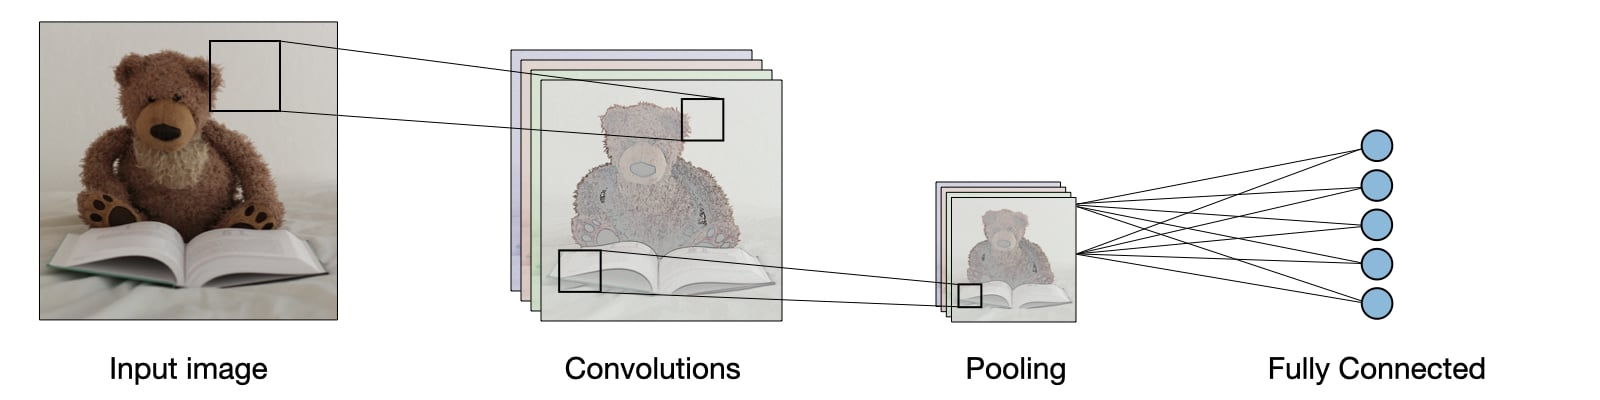

### Building Convolutional Layer <a id="2.1"></a>

In [53]:
# 1 it is convolutinal layer
cnn.add(tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3, # most common use number is 3 
                              activation="relu", # activation function
                               input_shape=[64,64,3], # 64x64 is image size and 3 for rgb layers
                              ))  
# 2 it is pooling layer, and pool size=2 mean is 2x2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2)) 


#### Applying One More Time  <a id="2.1.1"></a>
This step for reducing image size one more time. And we shouldn't do it no more time because we're starting the loosing some important features.

In [54]:
# it was convolutinal layer
cnn.add(tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3, # most common use number is 3 
                              activation="relu"))  
#pooling layer, and pool size=2 mean is 2x2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2)) 

In [55]:
# For Avoiding overfitting
cnn.add(tf.keras.layers.Dropout(0.5))

In [56]:
# 3 flatten process
cnn.add(tf.keras.layers.Flatten())

In [57]:
# 4 building our neural network layer
cnn.add(tf.keras.layers.Dense(units=128,activation="relu",)) # units is number of neuron number

In [58]:
# 5 building output layer
cnn.add(tf.keras.layers.Dense(units=36,activation="softmax")) # units is number 36 because we have 36 class

### Training and Compiling <a id="2.2"></a>

In [59]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,649,124 (6.29 MB)

 Trainable params: 1,649,124 (6.29 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32


KeyboardInterrupt: 

# Model Evaluating <a id="3"></a>

In [ ]:
#Training dataset Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

In [ ]:
#Validation dataset Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

# Saving Model <a id="4"></a>

In [ ]:
# cnn.save('trained_model.h5')

In [ ]:
training_history.history # It Returns Dictionary of Training history

In [ ]:
print(training_history.history.keys())

## Calculating Accuracy of Model Achieved on Validation set <a id="4.1"></a>

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

### Accuracy Visualization <a id="4.1.1"></a>

### Visualization Training Dataset's Accuracy  <a id="4.1.1.1"></a>

In [ ]:
training_history.history['accuracy']

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

### Visualization Validation Dataset's Accuracy  <a id="4.1.1.2"></a>

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

# Evaluating Test Dataset <a id="5"></a>

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/fruit-and-vegetable-image-recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)